We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-13 12:16:50--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.89, 13.227.223.78, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
df[df['geoId'] == 'AI']['popData2018'].iloc[0]

nan

To make room in the dataframe for future predictions and smoothed input data, we add columns for those values and set them to missing for now.

In [5]:
df['pcases']  = np.nan
df['scases']  = np.nan
df['pdeaths'] = np.nan
df['sdeaths'] = np.nan

Last check of our source dataframe.

In [6]:
df.count()

dateRep                    16741
day                        16741
month                      16741
year                       16741
cases                      16741
deaths                     16741
countriesAndTerritories    16741
geoId                      16741
countryterritoryCode       16593
popData2018                16540
continentExp               16741
pcases                         0
scases                         0
pdeaths                        0
sdeaths                        0
dtype: int64

We pivot to a country by column format.

In [7]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-09   0.0  553.0  215.0  0.0  0.0   8.0  145.0  7.0  240.0  62.0  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-09     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[135 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [8]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('91 days'))
df_geo = df_geo.reindex(new_index)
df_geo.describe()

cases                                                          \
geoId         AD          AE          AF         AG        AI         AL   
count  61.000000  129.000000  125.000000  55.000000  48.00000  66.000000   
mean   12.426230  152.410853   39.736000   0.454545   0.06250  13.272727   
std    12.731142  231.072554   75.868854   1.183500   0.31999   8.002971   
min     0.000000    0.000000    0.000000   0.000000   0.00000   0.000000   
25%     1.000000    0.000000    0.000000   0.000000   0.00000   7.000000   
50%     8.000000    1.000000    0.000000   0.000000   0.00000  12.000000   
75%    20.000000  370.000000   43.000000   0.000000   0.00000  17.750000   
max    43.000000  783.000000  369.000000   6.000000   2.00000  34.000000   

                                                       ... pdeaths            \
geoId          AM         AO          AR           AT  ...      VC   VE   VG   
count  126.000000  53.000000   68.000000   135.000000  ...     0.0  0.0  0.0   
mean    28.079365   0.849057   96.323529   117.851852  ...     NaN  NaN  NaN   
std     41.015237   1.573778   90.677951   211.863499  ...     NaN  NaN  NaN   
min      0.000000   0.000000    0.000000     0.000000  ...     NaN  NaN  NaN   
25%      0.000000   0.000000   13.750000     0.000000  ...     NaN  NaN  NaN   
50%      0.000000   0.000000   88.500000    10.000000  ...     NaN  NaN  NaN   
75%     47.750000   1.000000  144.500000   122.500000  ...     NaN  NaN  NaN   
max    163.000000   7.000000  529.000000  1141.000000  ...     NaN  NaN  NaN   

                                          
geoId   VI   VN   XK   YE   ZA   ZM   ZW  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [9]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    226.000000
mean     476.500000
std       65.384759
min      364.000000
25%      420.250000
50%      476.500000
75%      532.750000
max      589.000000
Name: daynum, dtype: float64

For each country we create a simple dataframe to contain the source values for our fitting algorithm. We take the `mean` of two  days to smooth out frequent reporting delays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 1 in 100.000 of the population and take the logarithm.

In [10]:
# Suppress warnings on memory usage of multiple plots

import matplotlib as mpl
mpl.rc('figure', max_open_warning=0)

RU factors [-6.32280522e-04  6.34564190e-01 -1.55152042e+02] residuals 0.07514823374687847
US factors [-6.62355031e-04  6.31194982e-01 -1.45836053e+02] residuals 0.48543537565020306
BR factors [-2.59929078e-04  2.75517627e-01 -6.87763870e+01] residuals 0.18131835702690577
AT factors [-2.36868636e-03  2.15141454e+00 -4.85739660e+02] residuals 0.5327214826479835
CH factors [-1.16149164e-03  1.06309713e+00 -2.40335078e+02] residuals 1.2684544080291196
DE factors [-6.48047563e-04  5.97570027e-01 -1.34155274e+02] residuals 1.3393341766333278
IT factors [-5.99798075e-04  5.52704919e-01 -1.23647575e+02] residuals 0.8041431305846465
ES factors [-8.92207395e-04  8.26378037e-01 -1.87619152e+02] residuals 2.9769744515108414
FR factors [-7.87458921e-04  7.29835486e-01 -1.65585382e+02] residuals 1.6541346391074474
SE factors [-3.80694705e-04  3.66299797e-01 -8.53397665e+01] residuals 0.605148437356824
UK factors [-7.11829457e-04  6.81243917e-01 -1.59219715e+02] residuals 0.4652804358209263
IE facto

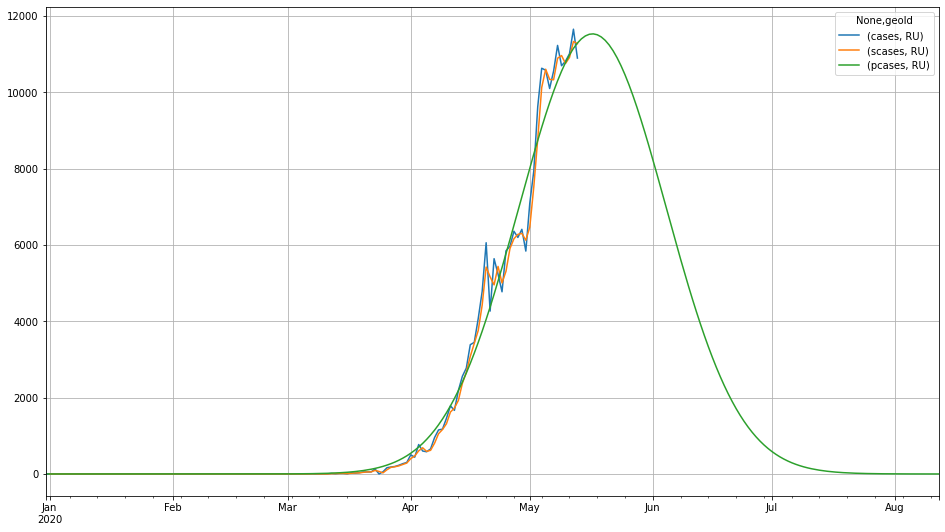

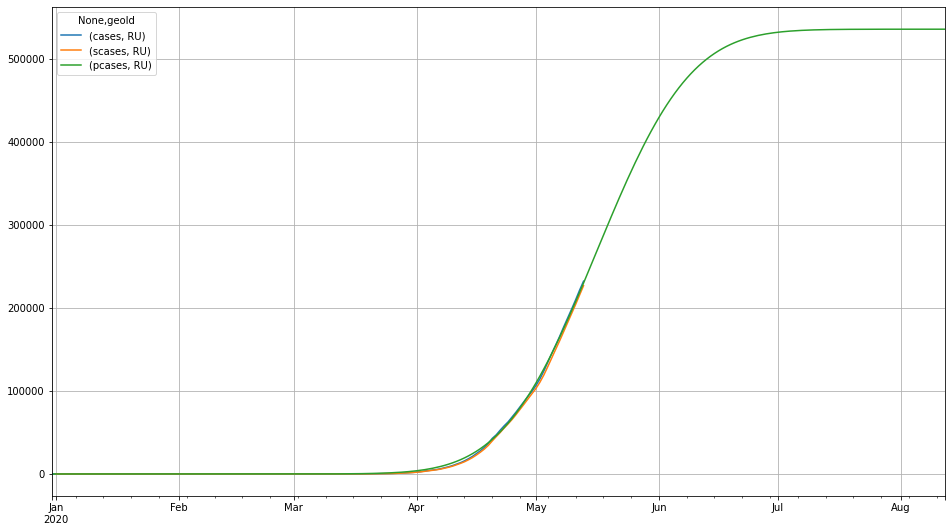

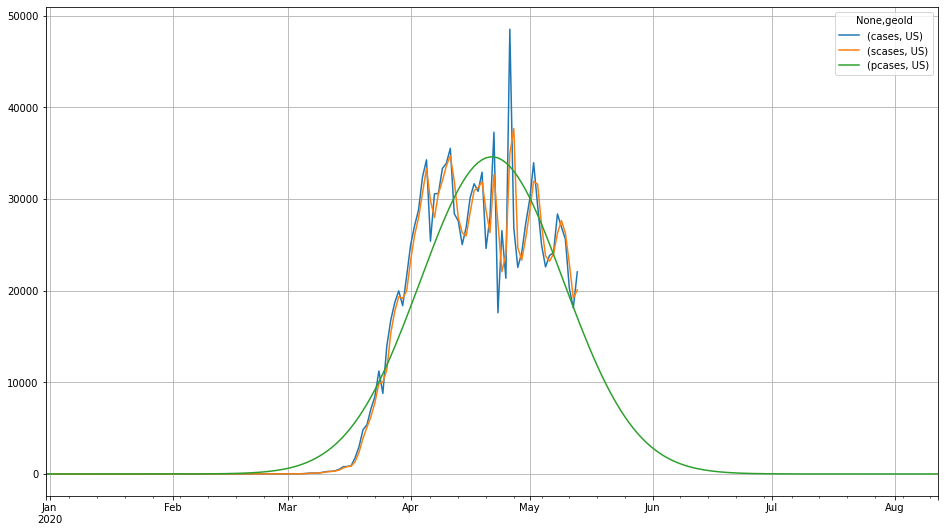

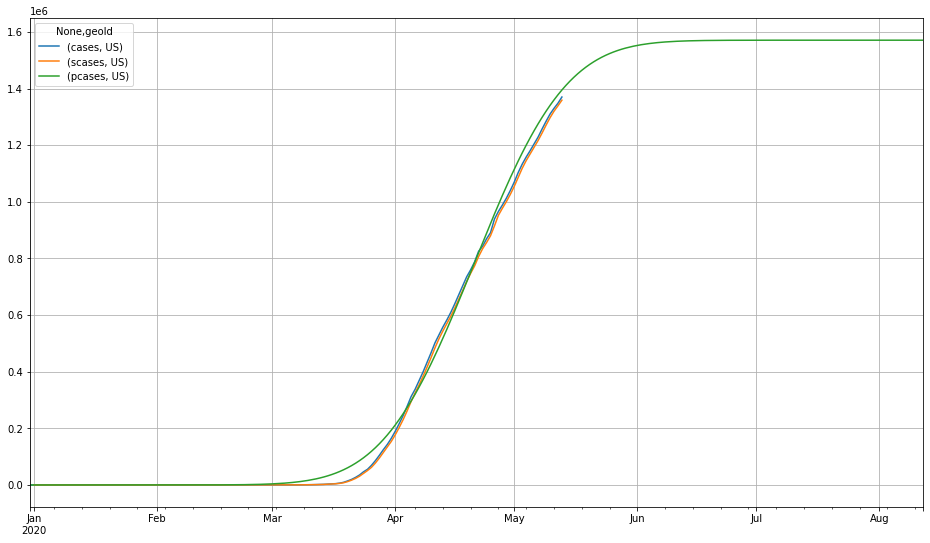

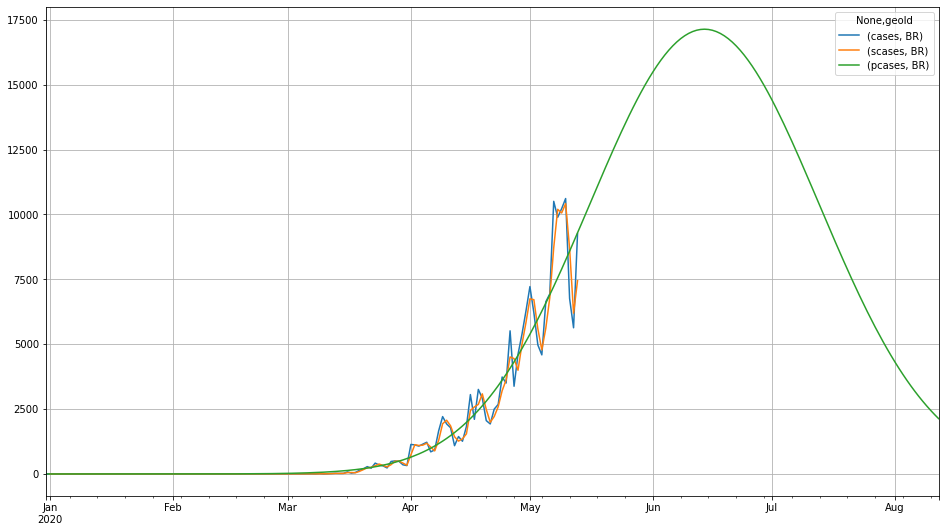

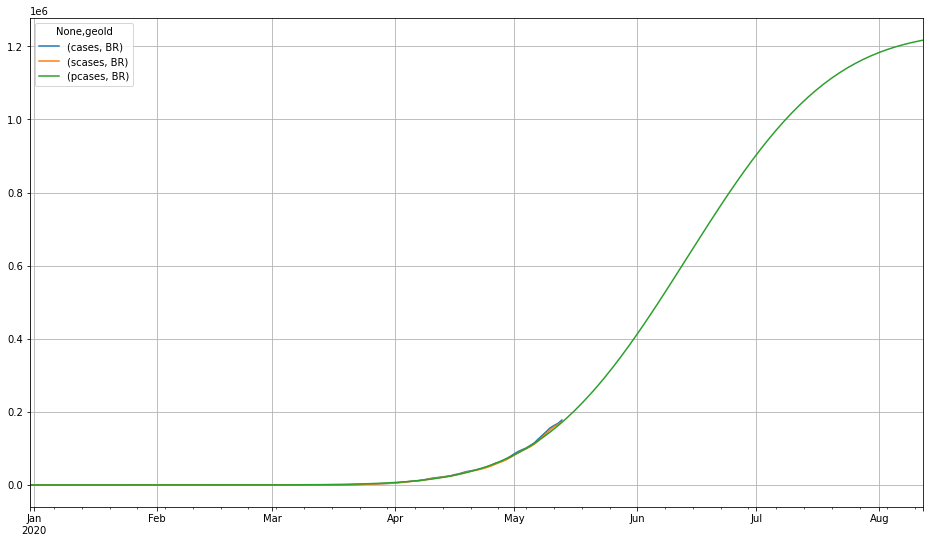

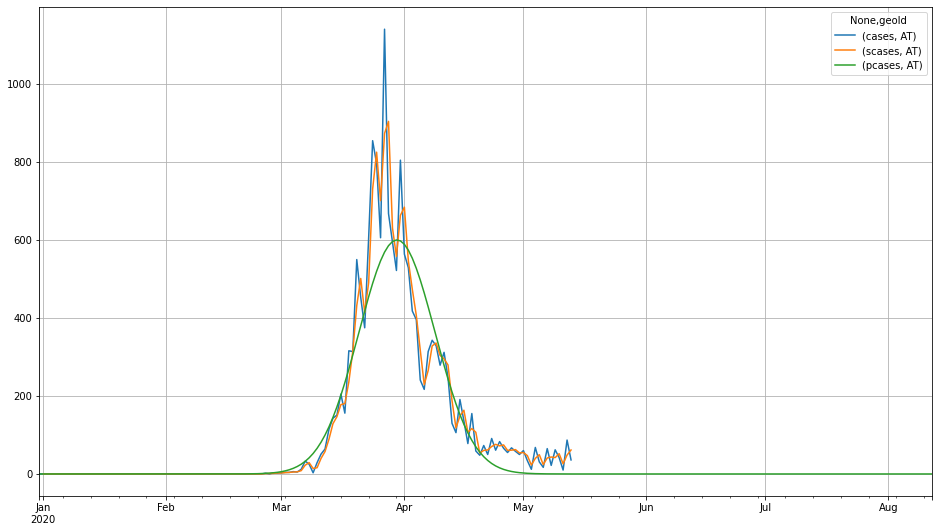

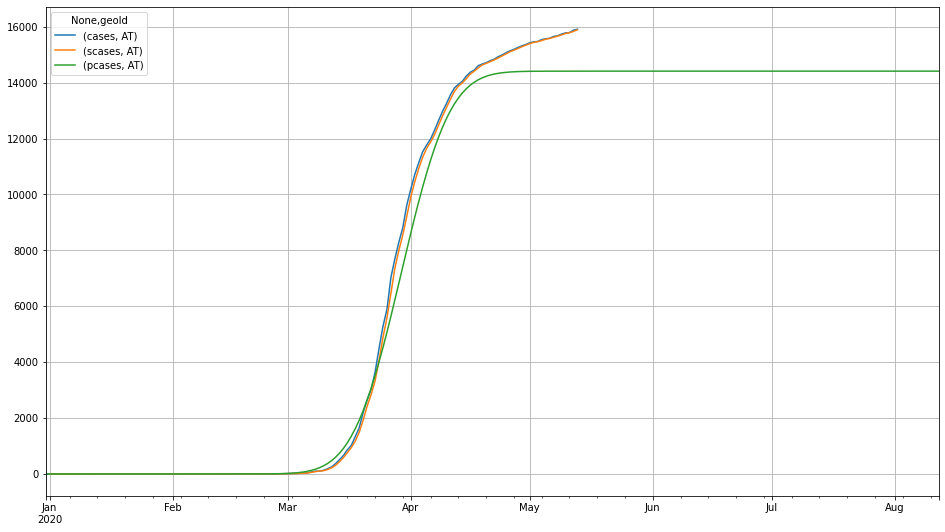

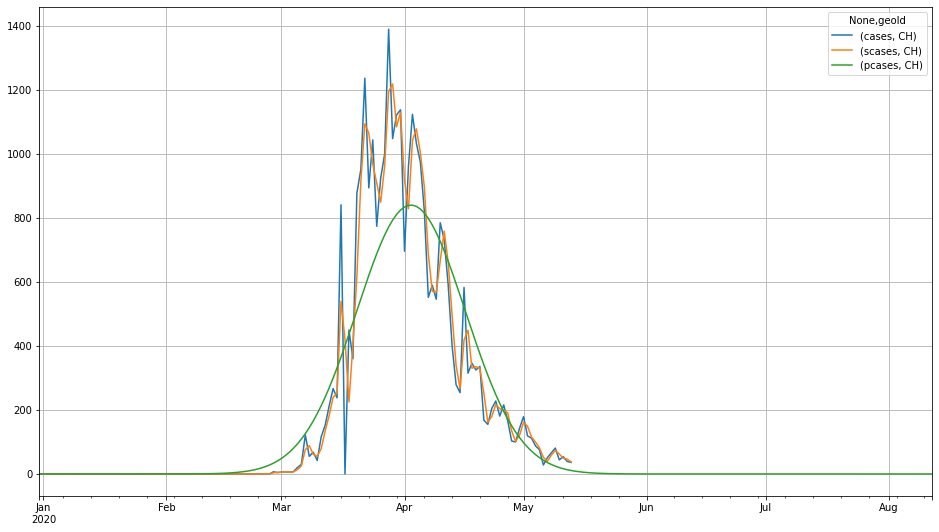

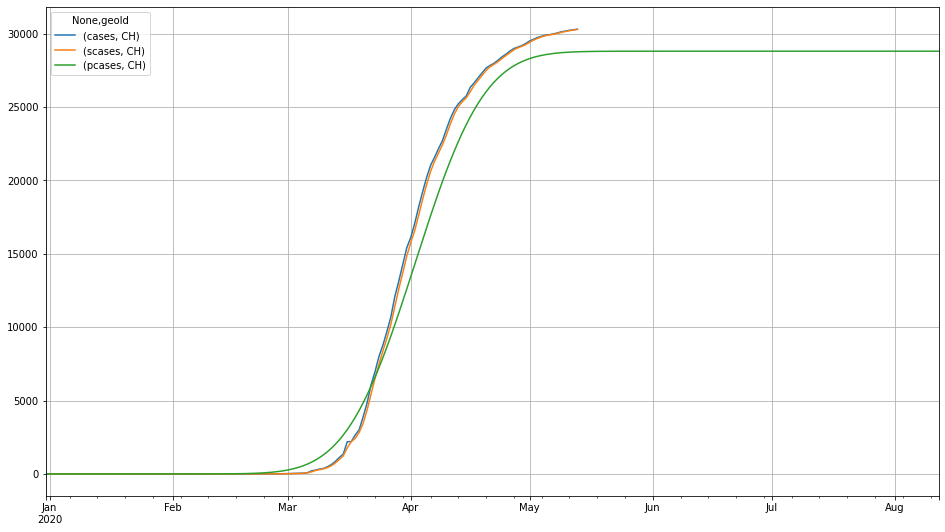

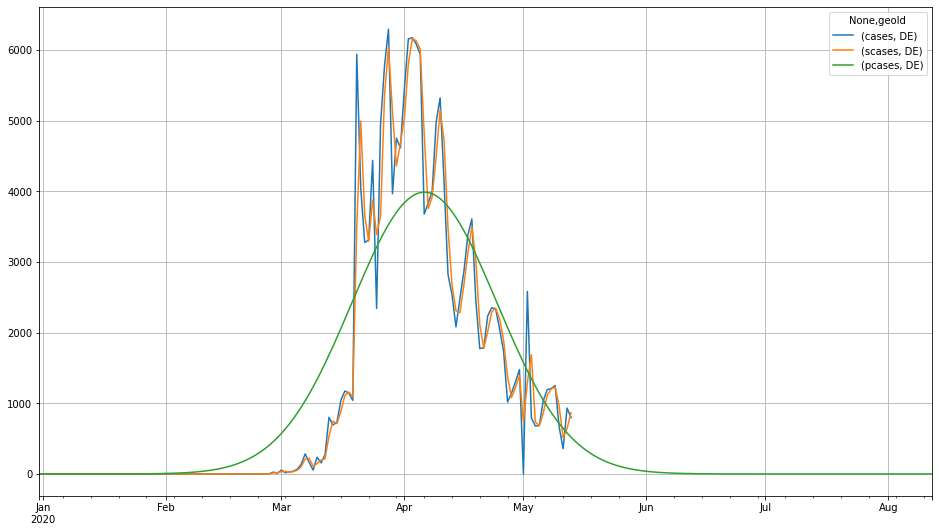

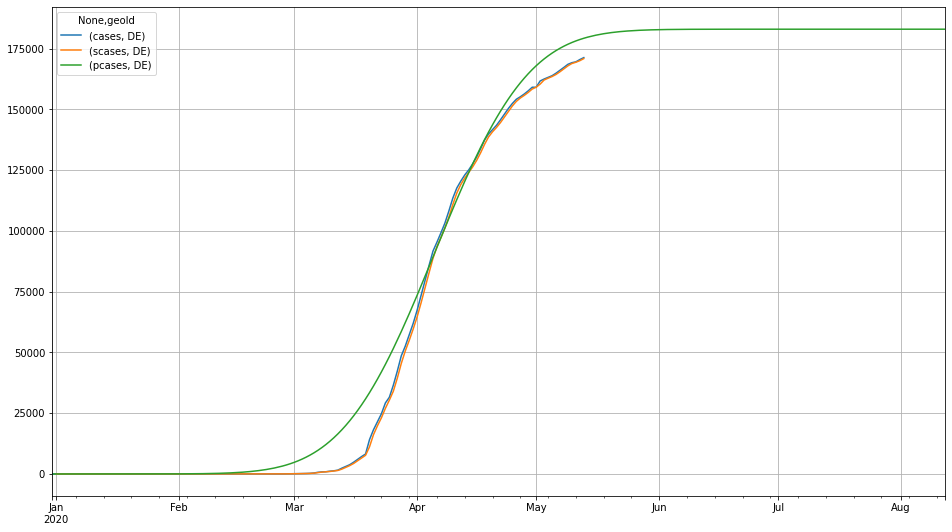

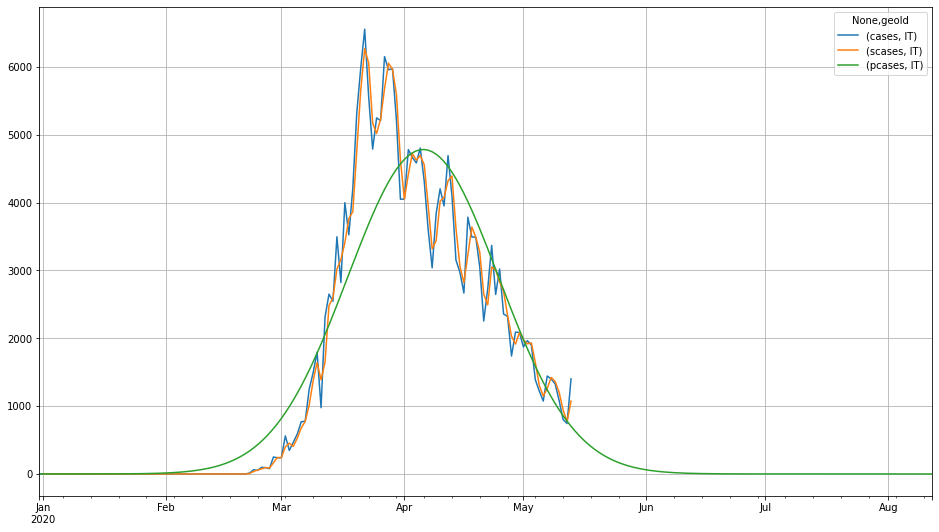

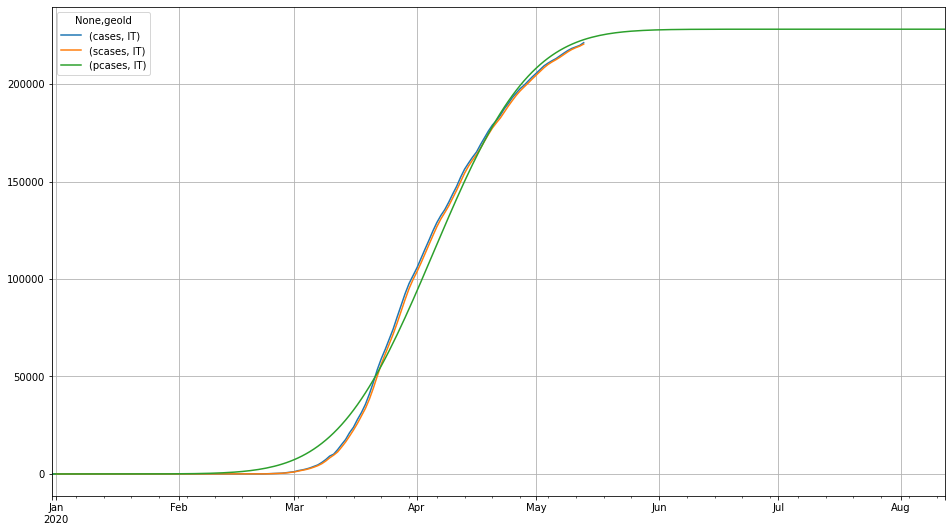

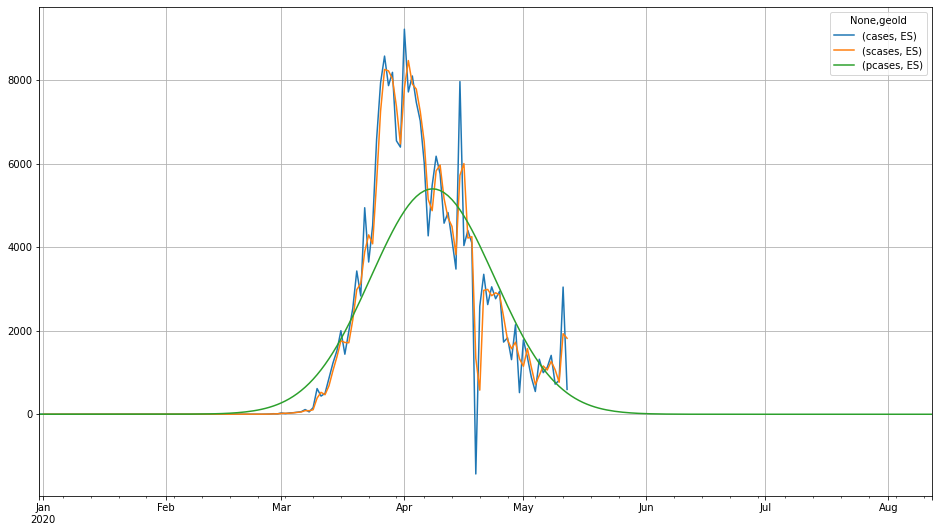

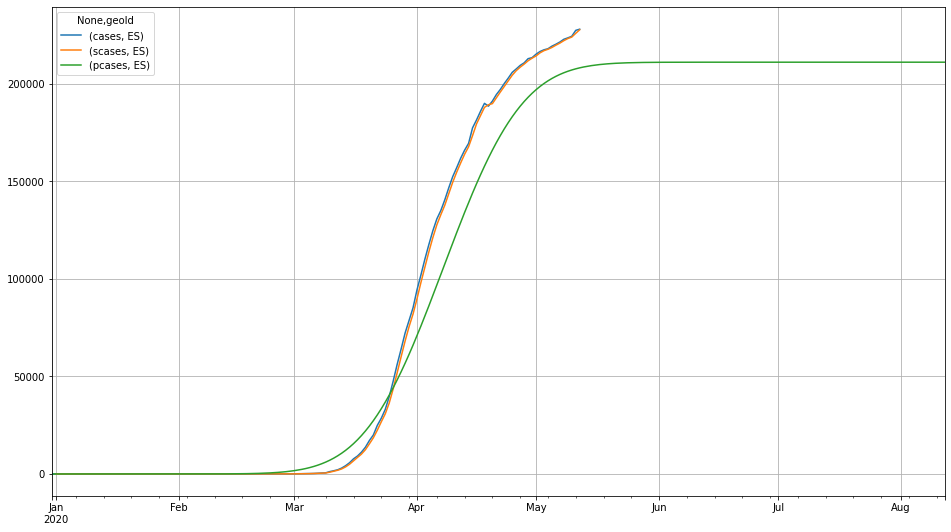

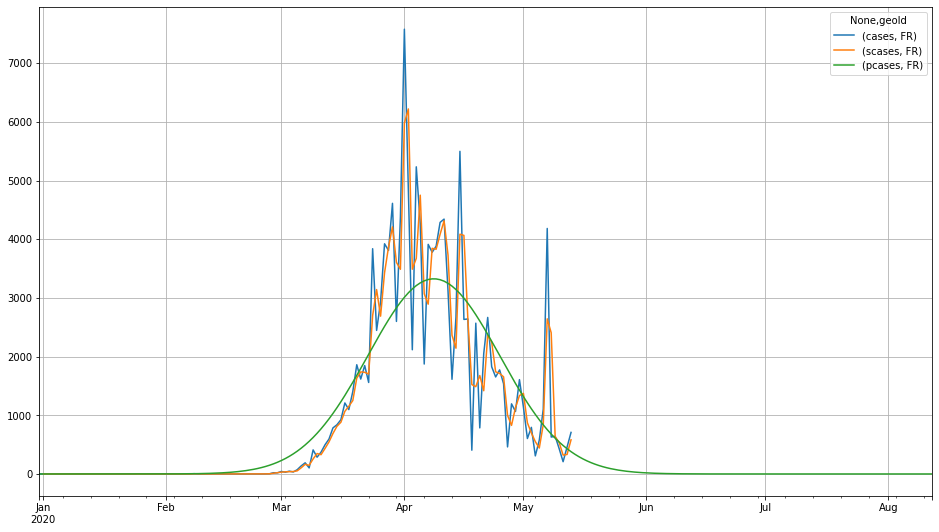

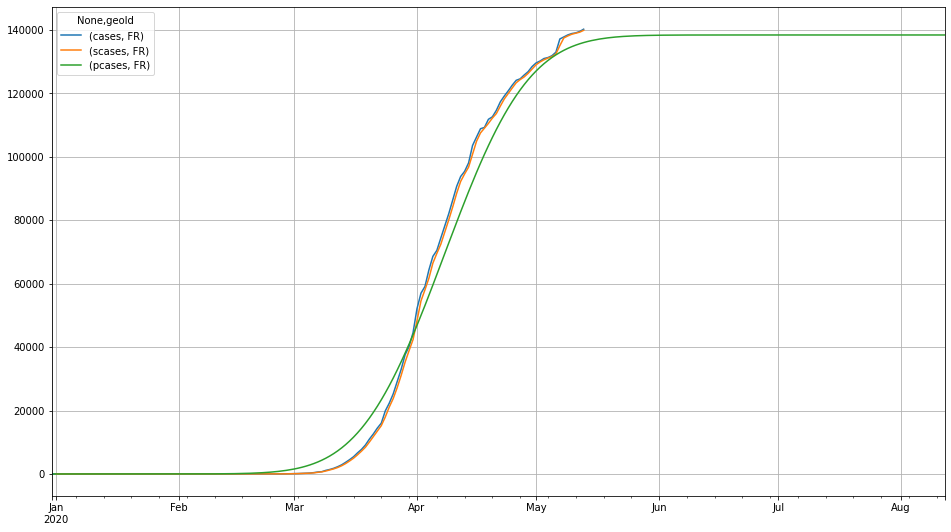

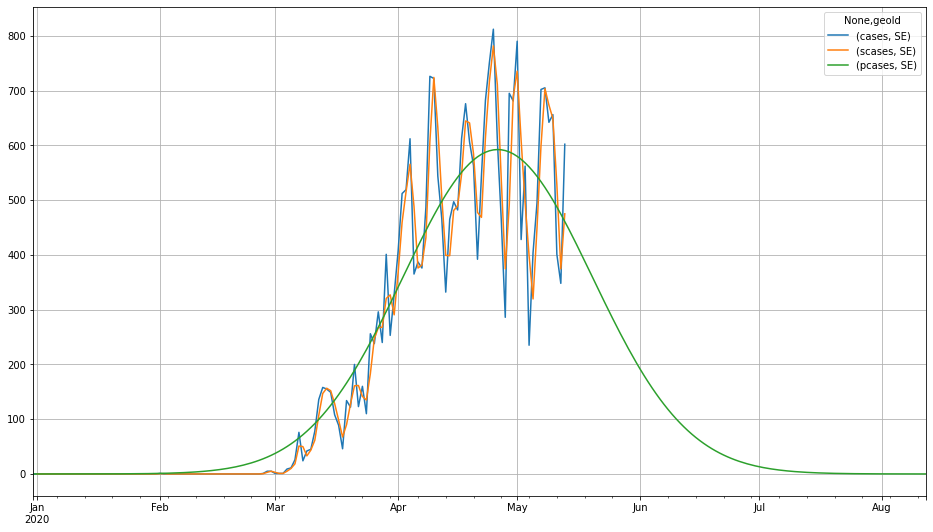

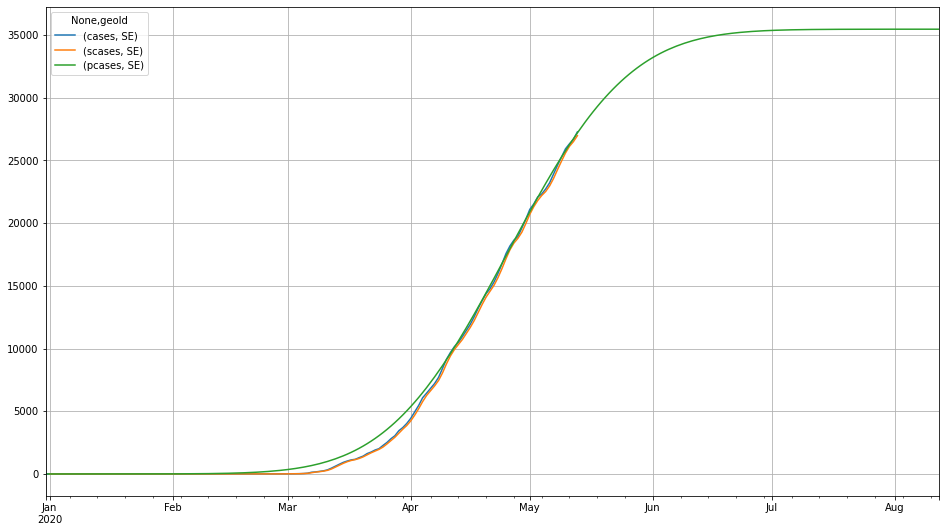

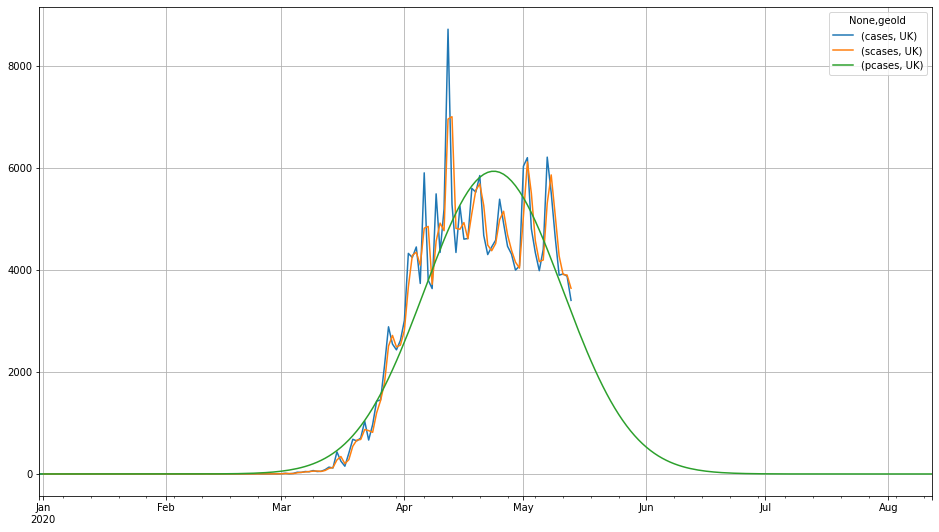

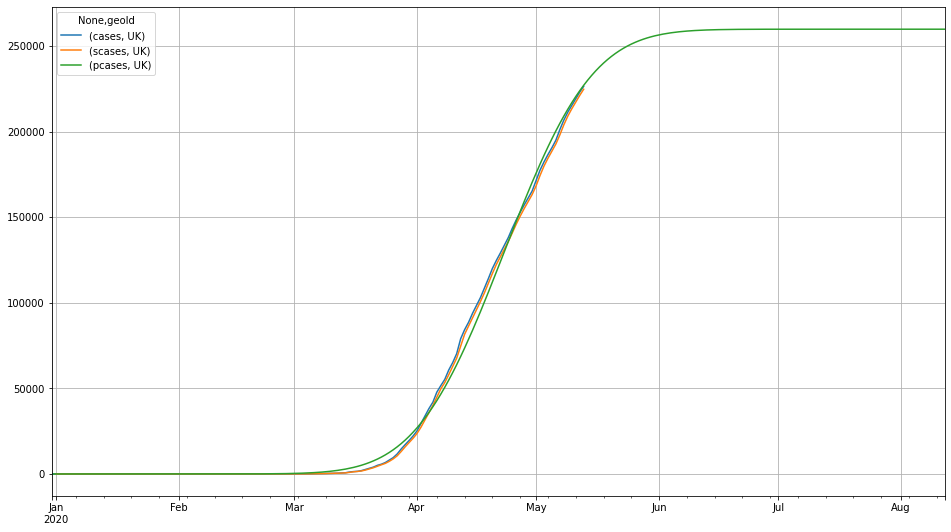

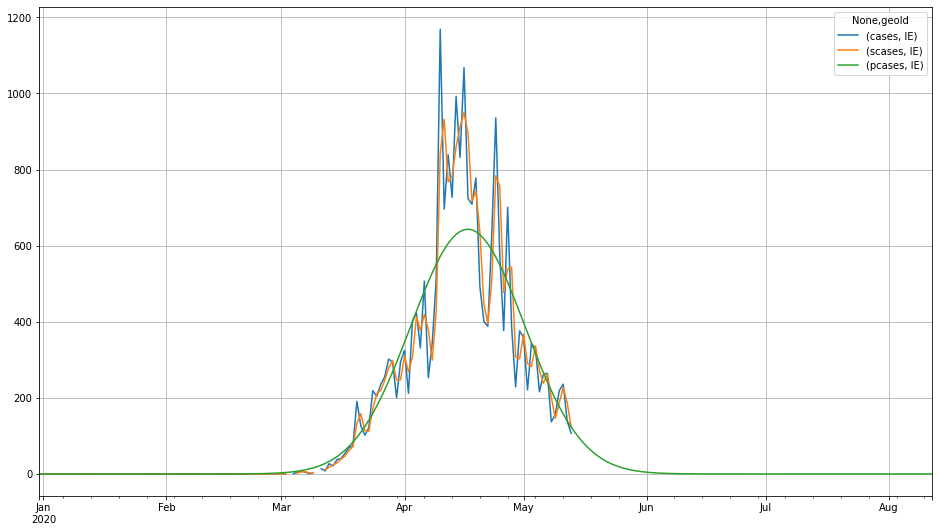

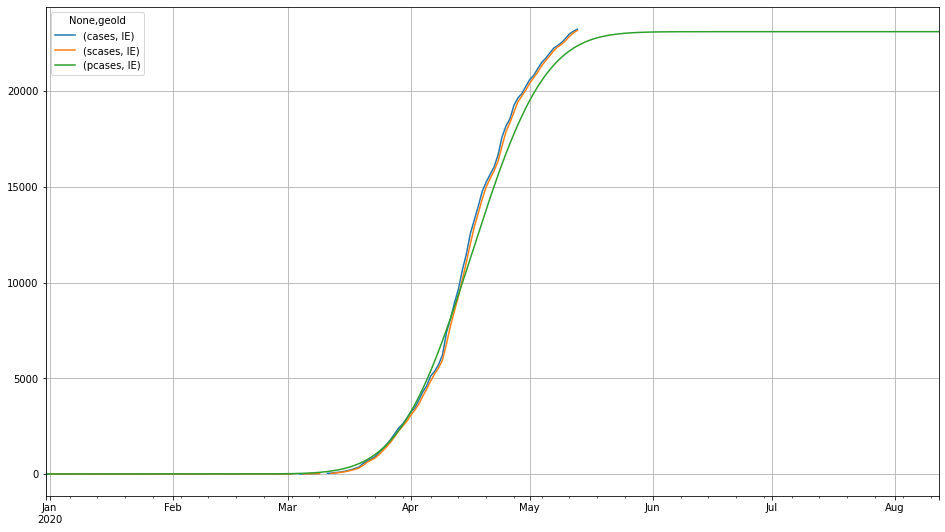

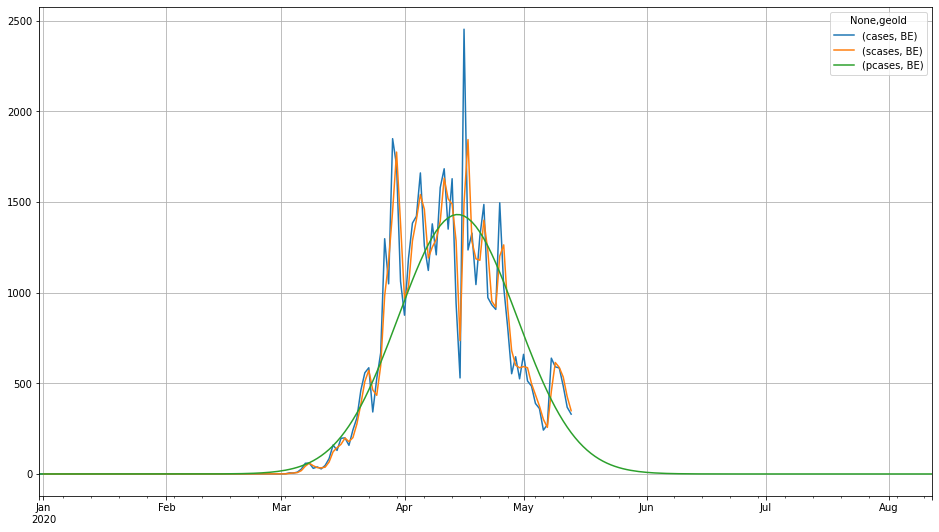

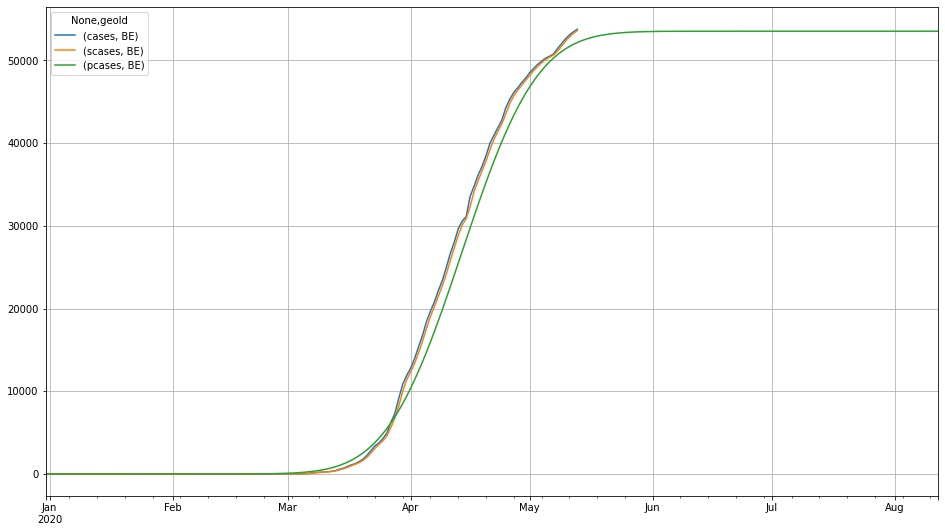

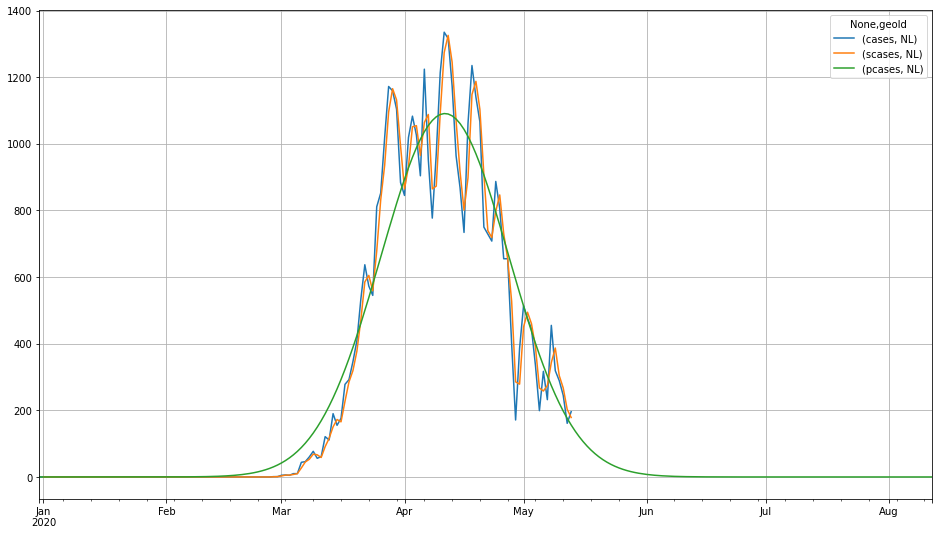

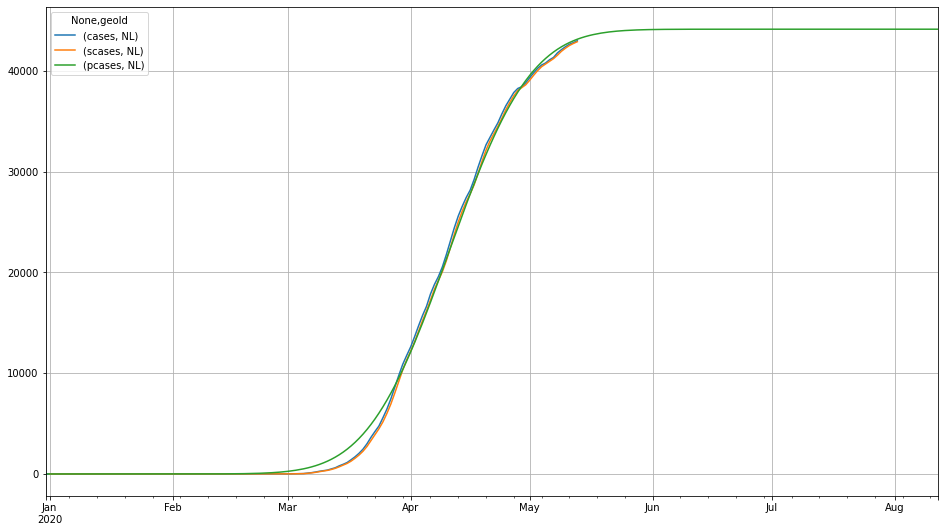

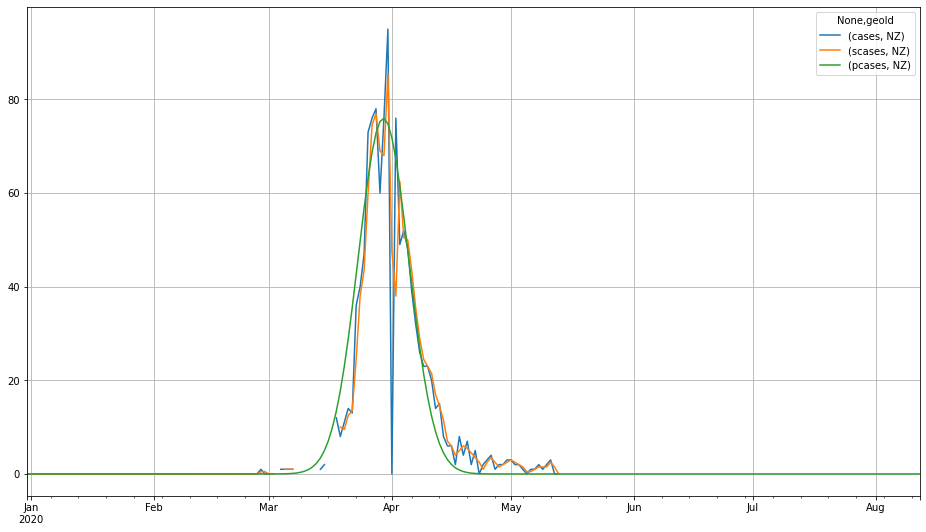

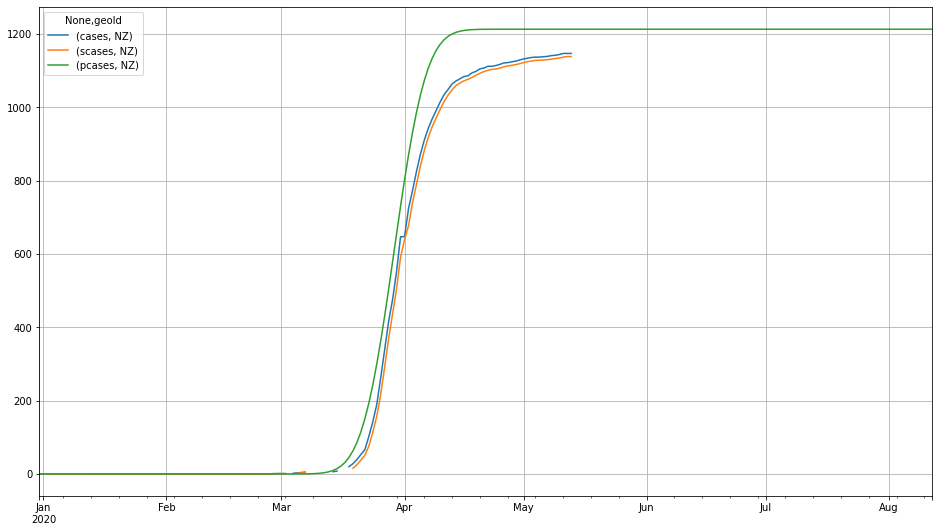

In [11]:
# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'UK', 'IE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(2).mean()
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[smeasure][country]})
    df_pred = df_pred[df_pred['y'] > df[df['geoId'] == country]['popData2018'].iloc[0] / 1e5]
    df_pred['y'] = np.log10(df_pred['y'])
    if len(df_pred) > 3:
        fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
        df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
        print(country, "factors", fit[0], "residuals", fit[1][0])
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.